<a href="https://colab.research.google.com/github/darrsshill/finance/blob/main/Lowes_vs_homedepo__stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-74597346.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed



TOTAL RETURNS SUMMARY
Period: 2020-11-27 to 2025-11-26

Lowe's: 68.78%
Home Depot: 43.53%

ANNUALIZED RETURNS
Lowe's: 11.04% per year
Home Depot: 7.50% per year

Graph saved as 'stock_returns_comparison.png'


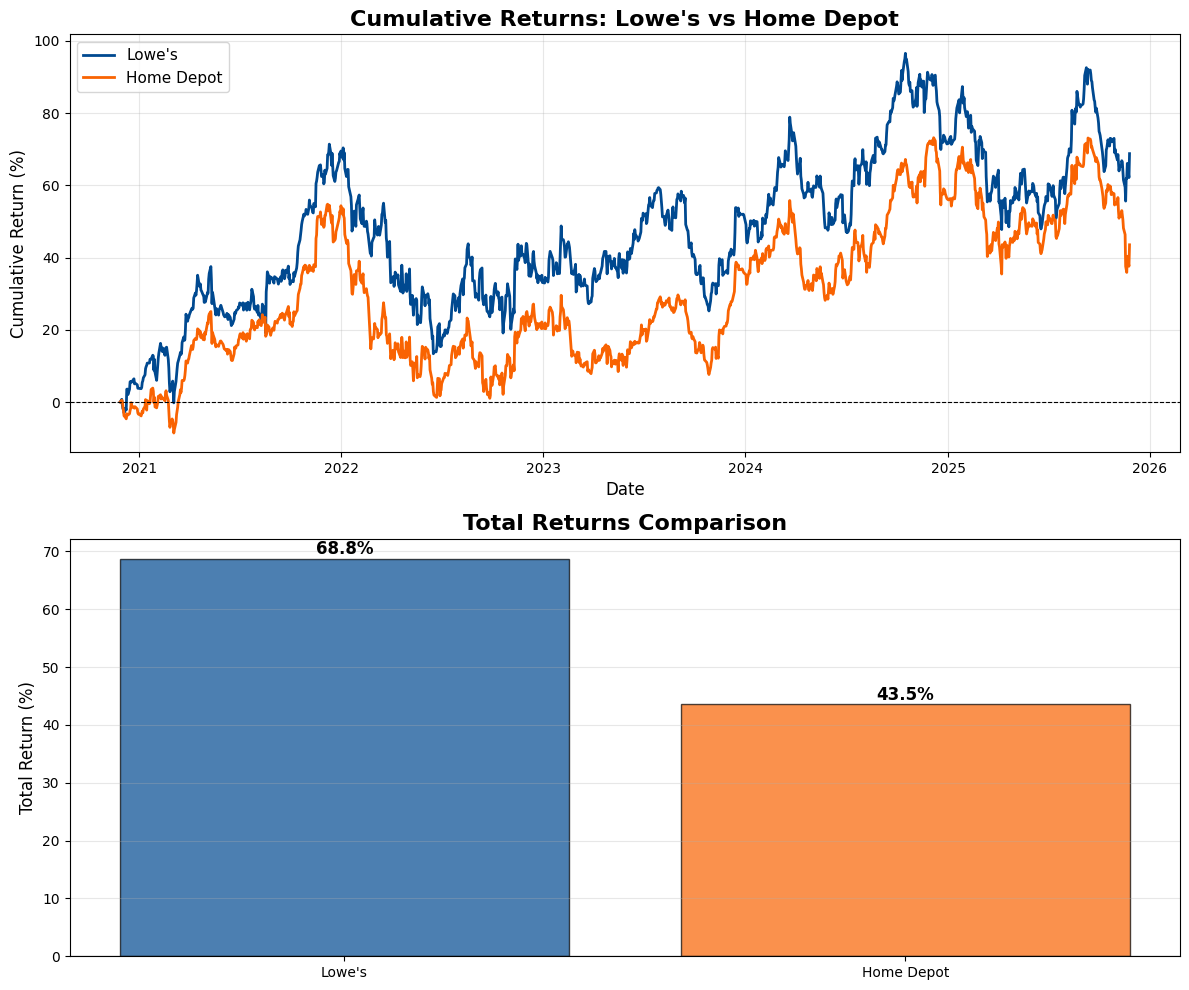


YEAR-BY-YEAR RETURNS

2021:
  Lowe's: 63.34%
  Home Depot: 59.51%

2022:
  Lowe's: -21.49%
  Home Depot: -21.98%

2023:
  Lowe's: 14.03%
  Home Depot: 12.77%

2024:
  Lowe's: 13.01%
  Home Depot: 15.00%

2025:
  Lowe's: -1.59%
  Home Depot: -8.09%


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define stock tickers
tickers = ['LOW', 'HD']  # Lowe's and Home Depot
stock_names = {'LOW': "Lowe's", 'HD': 'Home Depot'}

# Set date range (last 5 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

# Download stock data
print("Downloading stock data...")
# Fix: Changed 'Adj Close' to 'Close' as yfinance auto_adjust is now True by default
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Calculate cumulative returns
returns = (data / data.iloc[0] - 1) * 100

# Calculate total returns
total_returns = returns.iloc[-1]

# Print summary statistics
print("\n" + "="*50)
print("TOTAL RETURNS SUMMARY")
print("="*50)
print(f"Period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print(f"\n{stock_names['LOW']}: {total_returns['LOW']:.2f}%")
print(f"{stock_names['HD']}: {total_returns['HD']:.2f}%")
print("="*50)

# Calculate annualized returns
years = (end_date - start_date).days / 365.25
annualized_returns = {
    'LOW': ((1 + total_returns['LOW']/100) ** (1/years) - 1) * 100,
    'HD': ((1 + total_returns['HD']/100) ** (1/years) - 1) * 100
}

print("\nANNUALIZED RETURNS")
print(f"{stock_names['LOW']}: {annualized_returns['LOW']:.2f}% per year")
print(f"{stock_names['HD']}: {annualized_returns['HD']:.2f}% per year")

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Cumulative Returns Over Time
ax1.plot(returns.index, returns['LOW'], label=stock_names['LOW'], linewidth=2, color='#004990')
ax1.plot(returns.index, returns['HD'], label=stock_names['HD'], linewidth=2, color='#F96302')
ax1.set_title('Cumulative Returns: Lowe\'s vs Home Depot', fontsize=16, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cumulative Return (%)', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Plot 2: Total Returns Comparison (Bar Chart)
stocks = list(stock_names.values())
returns_values = [total_returns['LOW'], total_returns['HD']]
colors = ['#004990', '#F96302']

bars = ax2.bar(stocks, returns_values, color=colors, alpha=0.7, edgecolor='black')
ax2.set_title('Total Returns Comparison', fontsize=16, fontweight='bold')
ax2.set_ylabel('Total Return (%)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom' if height > 0 else 'top',
             fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('stock_returns_comparison.png', dpi=300, bbox_inches='tight')
print("\nGraph saved as 'stock_returns_comparison.png'")
plt.show()

# Calculate and display year-by-year returns
print("\n" + "="*50)
print("YEAR-BY-YEAR RETURNS")
print("="*50)
yearly_data = data.resample('YE').last()
yearly_returns = yearly_data.pct_change() * 100

for year in yearly_returns.index[1:]:
    print(f"\n{year.year}:")
    print(f"  {stock_names['LOW']}: {yearly_returns.loc[year, 'LOW']:.2f}%")
    print(f"  {stock_names['HD']}: {yearly_returns.loc[year, 'HD']:.2f}%")

Graph saved as 'net_income_comparison.png'

NET INCOME SUMMARY (in millions)

Year                 Home Depot          Lowe's      Difference
------------------------------------------------------------
FY 2022         $     16,433.00 $      8,442.00 $      7,991.00
FY 2023         $     17,105.00 $      6,437.00 $     10,668.00
FY 2024         $     15,143.00 $      7,726.00 $      7,417.00

AVERAGE NET INCOME
Home Depot: $16,227.00M
Lowe's: $7,535.00M

GROWTH ANALYSIS
Home Depot Growth (FY22 to FY24): -7.85%
Lowe's Growth (FY22 to FY24): -8.48%


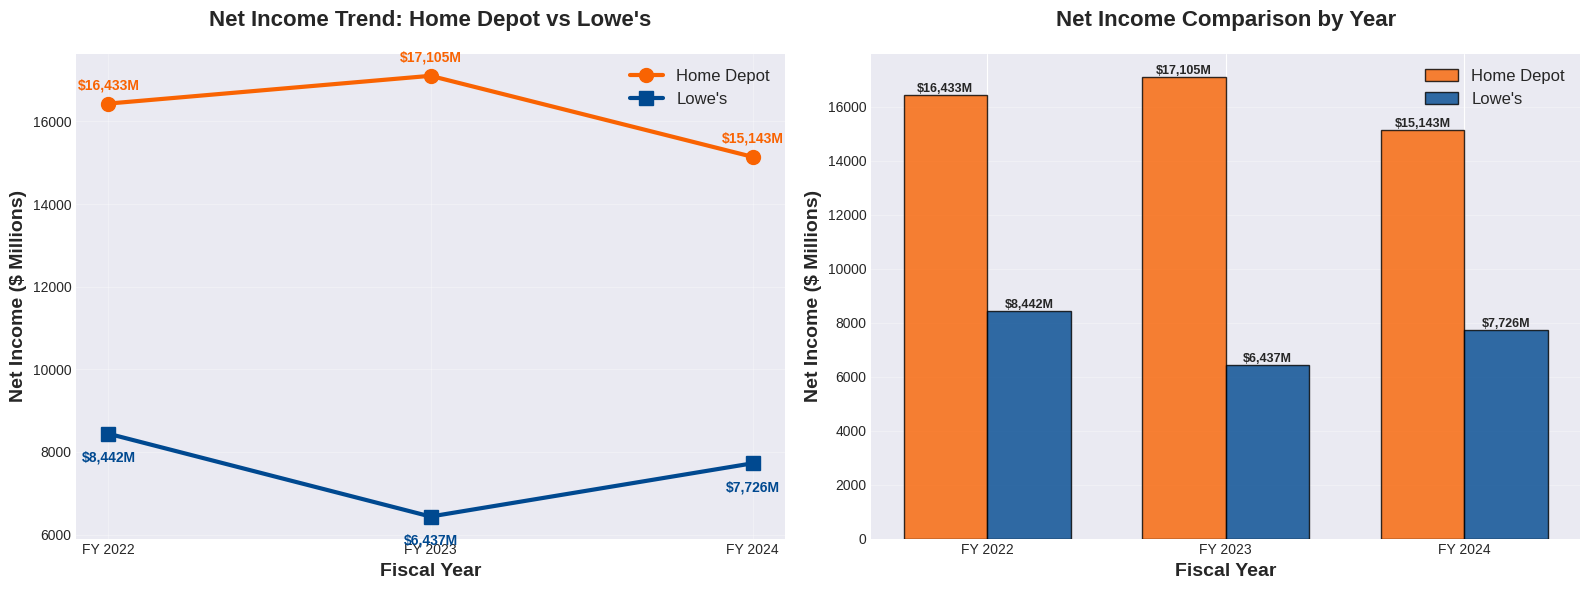

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Financial data (in millions)
years = ['FY 2022', 'FY 2023', 'FY 2024']

# Net Income data
home_depot_net_income = [16433.00, 17105.00, 15143.00]
lowes_net_income = [8442.00, 6437.00, 7726.00]

# Set up the plot style
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Line Chart Comparison
x = np.arange(len(years))
ax1.plot(x, home_depot_net_income, marker='o', linewidth=3, markersize=10,
         label='Home Depot', color='#F96302')
ax1.plot(x, lowes_net_income, marker='s', linewidth=3, markersize=10,
         label="Lowe's", color='#004990')

ax1.set_xlabel('Fiscal Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('Net Income ($ Millions)', fontsize=14, fontweight='bold')
ax1.set_title('Net Income Trend: Home Depot vs Lowe\'s', fontsize=16, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.legend(fontsize=12, loc='best')
ax1.grid(True, alpha=0.3)

# Add value labels on points
for i, (hd, low) in enumerate(zip(home_depot_net_income, lowes_net_income)):
    ax1.annotate(f'${hd:,.0f}M', (i, hd), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=10, fontweight='bold', color='#F96302')
    ax1.annotate(f'${low:,.0f}M', (i, low), textcoords="offset points",
                xytext=(0,-20), ha='center', fontsize=10, fontweight='bold', color='#004990')

# Plot 2: Grouped Bar Chart
x_pos = np.arange(len(years))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, home_depot_net_income, width,
               label='Home Depot', color='#F96302', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x_pos + width/2, lowes_net_income, width,
               label="Lowe's", color='#004990', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Fiscal Year', fontsize=14, fontweight='bold')
ax2.set_ylabel('Net Income ($ Millions)', fontsize=14, fontweight='bold')
ax2.set_title('Net Income Comparison by Year', fontsize=16, fontweight='bold', pad=20)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(years)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}M',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('net_income_comparison.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'net_income_comparison.png'")

# Print summary statistics
print("\n" + "="*60)
print("NET INCOME SUMMARY (in millions)")
print("="*60)
print(f"\n{'Year':<15} {'Home Depot':>15} {'Lowe\'s':>15} {'Difference':>15}")
print("-"*60)
for i, year in enumerate(years):
    diff = home_depot_net_income[i] - lowes_net_income[i]
    print(f"{year:<15} ${home_depot_net_income[i]:>14,.2f} ${lowes_net_income[i]:>14,.2f} ${diff:>14,.2f}")

print("\n" + "="*60)
print("AVERAGE NET INCOME")
print("="*60)
print(f"Home Depot: ${np.mean(home_depot_net_income):,.2f}M")
print(f"Lowe's: ${np.mean(lowes_net_income):,.2f}M")

print("\n" + "="*60)
print("GROWTH ANALYSIS")
print("="*60)
hd_growth = ((home_depot_net_income[-1] - home_depot_net_income[0]) / home_depot_net_income[0]) * 100
low_growth = ((lowes_net_income[-1] - lowes_net_income[0]) / lowes_net_income[0]) * 100
print(f"Home Depot Growth (FY22 to FY24): {hd_growth:.2f}%")
print(f"Lowe's Growth (FY22 to FY24): {low_growth:.2f}%")

plt.show()

Graph saved as 'net_income_margin_analysis.png'

NET INCOME MARGIN ANALYSIS

Year              HD Revenue   HD Net Income    HD Margin     Low Revenue  Low Net Income   Low Margin
--------------------------------------------------------------------------------
FY 2022      $       151,157 $        16,433       10.87% $        96,250 $         8,442        8.77%
FY 2023      $       157,403 $        17,105       10.87% $        97,059 $         6,437        6.63%
FY 2024      $       152,669 $        15,143        9.92% $        86,377 $         7,726        8.94%

AVERAGE METRICS (3-Year Period)
Company                  Avg Revenue  Avg Net Income      Avg Margin
--------------------------------------------------------------------------------
Home Depot           $    153,743.00 $     16,227.00          10.55%
Lowe's               $     93,228.67 $      7,535.00           8.12%

MARGIN COMPARISON & INSIGHTS
Average Margin Difference: 2.44 percentage points
Home Depot maintains higher p

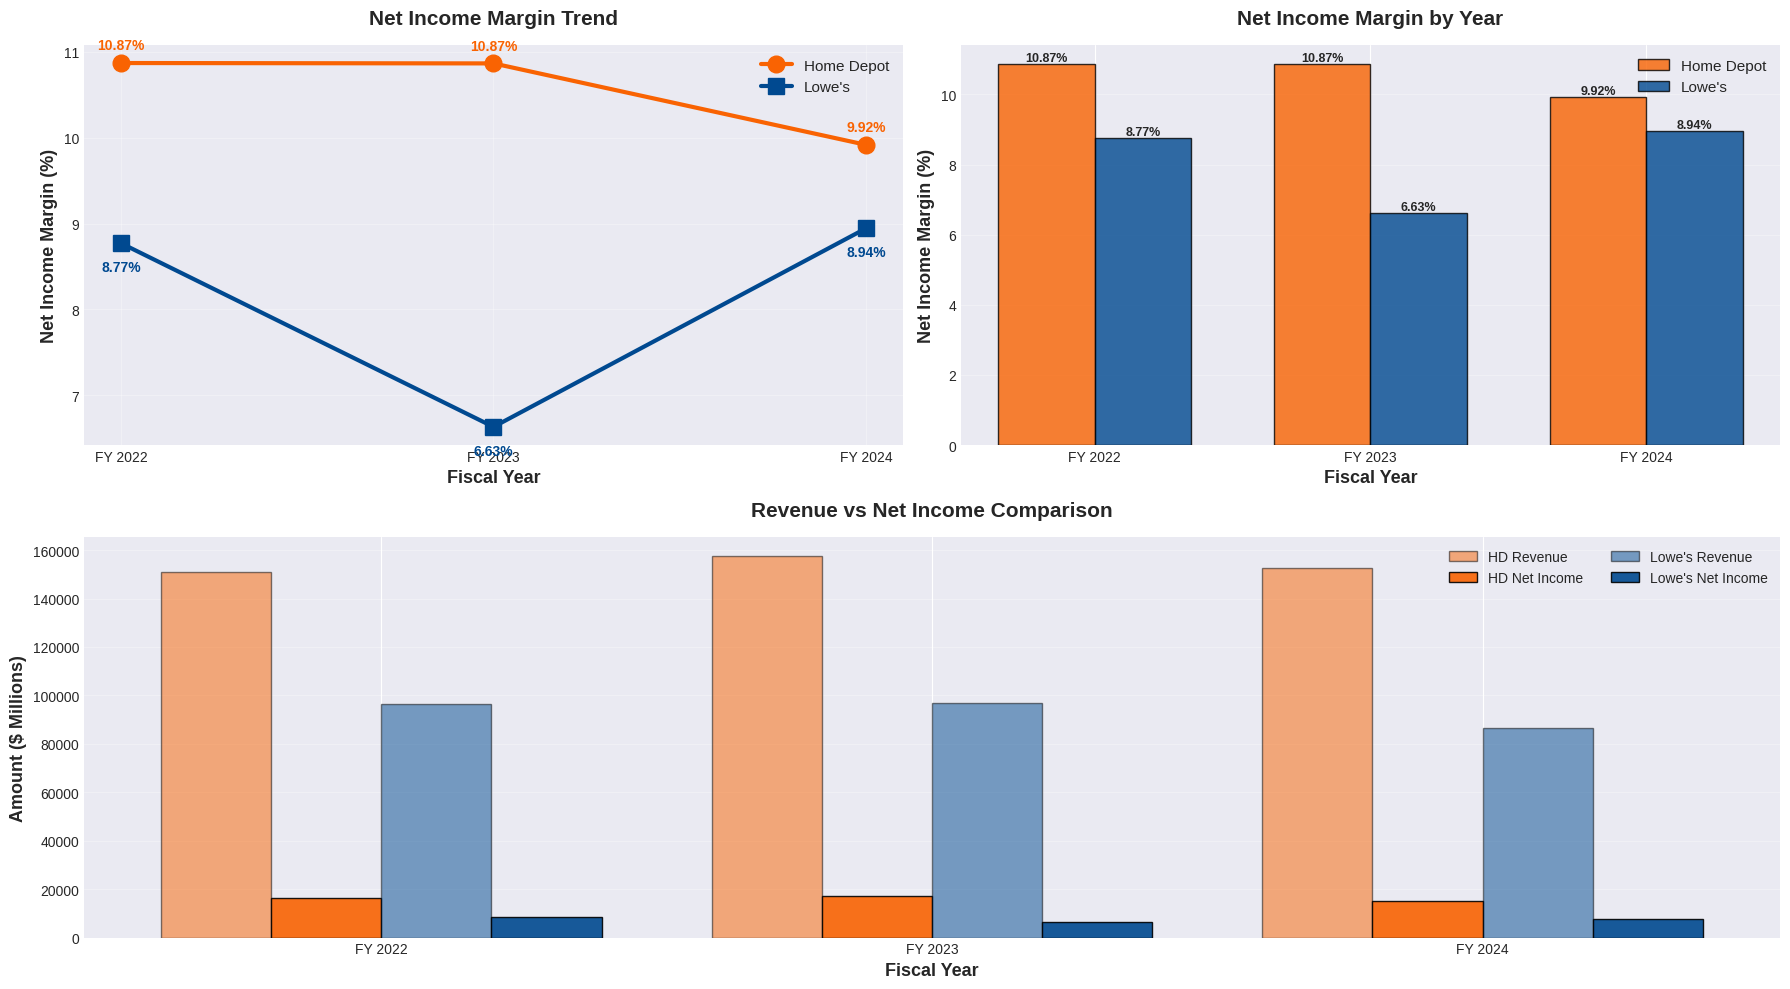

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Financial data (in millions)
years = ['FY 2022', 'FY 2023', 'FY 2024']

# Revenue data
home_depot_revenue = [151157.00, 157403.00, 152669.00]
lowes_revenue = [96250.00, 97059.00, 86377.00]

# Net Income data
home_depot_net_income = [16433.00, 17105.00, 15143.00]
lowes_net_income = [8442.00, 6437.00, 7726.00]

# Calculate Net Income Margin (Net Income / Revenue * 100)
home_depot_margin = [(ni / rev) * 100 for ni, rev in zip(home_depot_net_income, home_depot_revenue)]
lowes_margin = [(ni / rev) * 100 for ni, rev in zip(lowes_net_income, lowes_revenue)]

# Set up the plot style
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(18, 10))

# Create 3 subplots
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 1, 2)

# Plot 1: Net Income Margin Trend (Line Chart)
x = np.arange(len(years))
ax1.plot(x, home_depot_margin, marker='o', linewidth=3, markersize=12,
         label='Home Depot', color='#F96302')
ax1.plot(x, lowes_margin, marker='s', linewidth=3, markersize=12,
         label="Lowe's", color='#004990')

ax1.set_xlabel('Fiscal Year', fontsize=13, fontweight='bold')
ax1.set_ylabel('Net Income Margin (%)', fontsize=13, fontweight='bold')
ax1.set_title('Net Income Margin Trend', fontsize=15, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.legend(fontsize=11, loc='best')
ax1.grid(True, alpha=0.3)

# Add value labels on points
for i, (hd, low) in enumerate(zip(home_depot_margin, lowes_margin)):
    ax1.annotate(f'{hd:.2f}%', (i, hd), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=10, fontweight='bold', color='#F96302')
    ax1.annotate(f'{low:.2f}%', (i, low), textcoords="offset points",
                xytext=(0,-20), ha='center', fontsize=10, fontweight='bold', color='#004990')

# Plot 2: Net Income Margin Comparison (Bar Chart)
x_pos = np.arange(len(years))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, home_depot_margin, width,
               label='Home Depot', color='#F96302', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x_pos + width/2, lowes_margin, width,
               label="Lowe's", color='#004990', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Fiscal Year', fontsize=13, fontweight='bold')
ax2.set_ylabel('Net Income Margin (%)', fontsize=13, fontweight='bold')
ax2.set_title('Net Income Margin by Year', fontsize=15, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(years)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 3: Combined Revenue and Net Income Comparison
x_pos = np.arange(len(years))
width = 0.2

# Create grouped bars for both companies
positions_hd_rev = x_pos - width * 1.5
positions_hd_ni = x_pos - width * 0.5
positions_low_rev = x_pos + width * 0.5
positions_low_ni = x_pos + width * 1.5

ax3.bar(positions_hd_rev, home_depot_revenue, width,
        label='HD Revenue', color='#F96302', alpha=0.5, edgecolor='black')
ax3.bar(positions_hd_ni, home_depot_net_income, width,
        label='HD Net Income', color='#F96302', alpha=0.9, edgecolor='black')
ax3.bar(positions_low_rev, lowes_revenue, width,
        label='Lowe\'s Revenue', color='#004990', alpha=0.5, edgecolor='black')
ax3.bar(positions_low_ni, lowes_net_income, width,
        label='Lowe\'s Net Income', color='#004990', alpha=0.9, edgecolor='black')

ax3.set_xlabel('Fiscal Year', fontsize=13, fontweight='bold')
ax3.set_ylabel('Amount ($ Millions)', fontsize=13, fontweight='bold')
ax3.set_title('Revenue vs Net Income Comparison', fontsize=15, fontweight='bold', pad=15)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(years)
ax3.legend(fontsize=10, loc='upper right', ncol=2)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('net_income_margin_analysis.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'net_income_margin_analysis.png'")

# Print comprehensive summary statistics
print("\n" + "="*80)
print("NET INCOME MARGIN ANALYSIS")
print("="*80)
print(f"\n{'Year':<12} {'HD Revenue':>15} {'HD Net Income':>15} {'HD Margin':>12} {'Low Revenue':>15} {'Low Net Income':>15} {'Low Margin':>12}")
print("-"*80)
for i, year in enumerate(years):
    print(f"{year:<12} ${home_depot_revenue[i]:>14,.0f} ${home_depot_net_income[i]:>14,.0f} {home_depot_margin[i]:>11.2f}% ${lowes_revenue[i]:>14,.0f} ${lowes_net_income[i]:>14,.0f} {lowes_margin[i]:>11.2f}%")

print("\n" + "="*80)
print("AVERAGE METRICS (3-Year Period)")
print("="*80)
print(f"{'Company':<20} {'Avg Revenue':>15} {'Avg Net Income':>15} {'Avg Margin':>15}")
print("-"*80)
print(f"{'Home Depot':<20} ${np.mean(home_depot_revenue):>14,.2f} ${np.mean(home_depot_net_income):>14,.2f} {np.mean(home_depot_margin):>14.2f}%")
print(f"{'Lowe\'s':<20} ${np.mean(lowes_revenue):>14,.2f} ${np.mean(lowes_net_income):>14,.2f} {np.mean(lowes_margin):>14.2f}%")

print("\n" + "="*80)
print("MARGIN COMPARISON & INSIGHTS")
print("="*80)
avg_margin_diff = np.mean(home_depot_margin) - np.mean(lowes_margin)
print(f"Average Margin Difference: {avg_margin_diff:.2f} percentage points")
print(f"Home Depot maintains {'higher' if avg_margin_diff > 0 else 'lower'} profitability margins")

print("\n" + "="*80)
print("YEAR-OVER-YEAR MARGIN CHANGES")
print("="*80)
for i in range(1, len(years)):
    hd_change = home_depot_margin[i] - home_depot_margin[i-1]
    low_change = lowes_margin[i] - lowes_margin[i-1]
    print(f"{years[i-1]} to {years[i]}:")
    print(f"  Home Depot: {hd_change:+.2f} percentage points")
    print(f"  Lowe\'s: {low_change:+.2f} percentage points")

plt.show()